In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Data

In [7]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=2024)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=2024)

In [10]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
X_train.shape

(11610, 8)

# Standardization

In [12]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)
X_valid_std = std.transform(X_valid)

# Model building

In [24]:
tf.keras.backend.clear_session()

tf.random.set_seed(2024)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(20,activation='relu',input_shape=(8,)), 

  tf.keras.layers.Dense(10,activation='relu'), 
  tf.keras.layers.Dense(5,activation='relu'), 
  tf.keras.layers.Dense(1)

])


c:\Users\Mr.Grumpy\miniconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 451 (1.76 KB)

 Trainable params: 451 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

# Complie

In [26]:
model.compile(loss="mean_squared_error",optimizer='sgd')

Fit

In [29]:
history = model.fit(X_train_std, y_train, epochs=200, validation_data=(X_valid_std, y_valid))

Epoch 1/200
  1/363 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - loss: 0.3390

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3343 - val_loss: 0.3264
Epoch 2/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3325 - val_loss: 0.3258
Epoch 3/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3307 - val_loss: 0.3248
Epoch 4/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3288 - val_loss: 0.3246
Epoch 5/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3276 - val_loss: 0.3247
Epoch 6/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3263 - val_loss: 0.3238
Epoch 7/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3244 - val_loss: 0.3234
Epoch 8/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3225 - val_loss: 0.3227
Epoch 9/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3218 - val_loss: 0.3227
Epoch 10/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3197 - val_loss: 0.3215
Epoch 11/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3189 - val_loss: 0.3217
Epoch 12/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

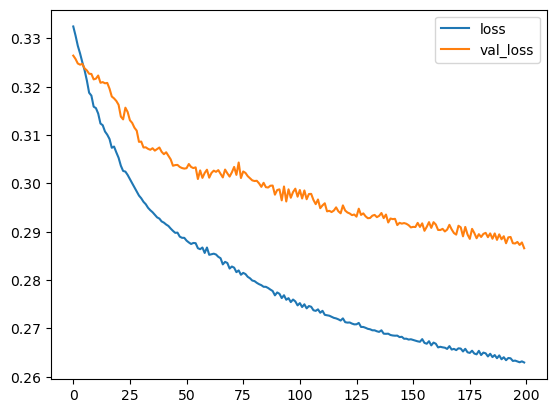

In [30]:
pd.DataFrame(history.history).plot()
plt.show()

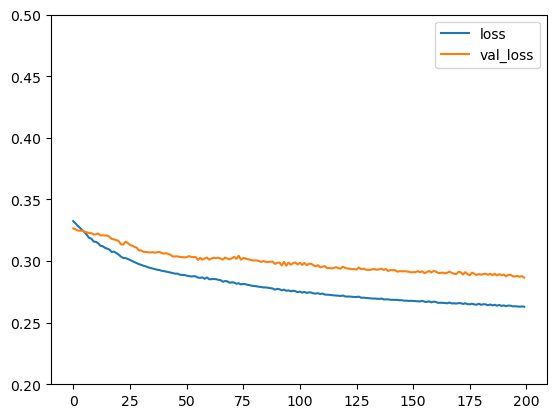

In [31]:
pd.DataFrame(history.history).plot(
  ylim =[0.2,0.5]
)
plt.show()